# Демонстрация к третьей задаче

## Игра Dota 2

Далее мы будем рассматривать данные по дракам в игре Dota 2.

[Dota 2](https://ru.wikipedia.org/wiki/Dota_2) — многопользовательская компьютерная игра жанра [MOBA](https://ru.wikipedia.org/wiki/MOBA). Игроки играют между собой матчи. В каждом матче участвует две команды, 5 человек в каждой. Игрока можно идентифицировать по номеру слота, на котором он сидит, одна команда играет за светлую сторону (The Radiant), слоты с 1 по 5, другая — за тёмную (The Dire), слоты с 6 по 10. Цель каждой команды — уничтожить главное здание базы противника (трон).

### Как проходит матч

#### 1. Игроки выбирают героев

Всего в игре чуть более 100 различных героев (персонажей). В начале игры, команды в определенном порядке выбирают героев себе и запрещают выбирать определенных героев противнику (баны). Каждый игрок будет управлять одним героем, в рамках одного матча не может быть несколько одинаковых героев.  Герои различаются между собой своими характеристиками и способностями. От комбинации выбранных героев во многом зависит успех команды.

<img src="images/screen_captains_mode.jpg" width="500">

#### 2. Основная часть

Игроки могут получать золото и опыт за убийство чужих героев, или прочих юнитов. Накопленный опыт влияет на уровень героя, который в свою очередь позволяет улучшать способности. За накопленное золото игроки покупают предметы, которые улучшают характеристики героев или дают им новые способности.

После смерти герой отправляется в "таверну" и возрождается только по прошествии некоторого времени, таким образом команда на некоторое время теряет игрока, однако игрок может досрочно выкупить героя из таверны за определенную сумму золота.

В течение игры команды развивают своих героев, обороняют свою часть поля и нападают на вражескую.

#### Драки
В игре существует понятие teamfight (драка, тимфайт). Тимфайт - это драка между персонажами двух соперничающих команд (The Radiant и The Dire), в которой участвуют как минимум 2 персонажа от каждой команды. Обычно тимфайты происходят при нападении на вышки, когда одна команда атакует, а другая защищается, а также при убийстве рошана, заходе на возвышенность и т.д. Драка может длиться от нескольких секунд, до нескольких минут, но обычно укладывается в 20-40 секунд. Обычно в игре происходит более 5 драк. Говорят, что команда победила в драке, если в сумме она заработала больше золота на момент окончания драки, чем команда противника.

In [1]:
from IPython.display import HTML

In [2]:
%%HTML
<iframe 
width="500" height="281" 
src="https://www.youtube.com/embed/fcLO6CdJwgg" 
frameborder="0" 
allow="autoplay; encrypted-media" allowfullscreen></iframe>

#### 3. Конец игры

Игра заканчивается, когда одна из команд разрушет определенное число "башен" противника и уничтожает трон.

<img src="images/screen_game_end.jpg" width="500">

## Загрузка необходимых библиотек

Для работы нам понадобятся две библиотеки:
1. `pandas`: при помощи нее мы считаем из файла таблицу с данными
2. `matplotlib`: библиотека для визуализации данных

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

## Чтение данных из CSV файла

Таблица содержит информацию по [золоту](https://dota2-ru.gamepedia.com/%D0%97%D0%BE%D0%BB%D0%BE%D1%82%D0%BE), [опыту](https://dota2-ru.gamepedia.com/%D0%9E%D0%BF%D1%8B%D1%82) и числу добитых [крипов](https://dota2-ru.gamepedia.com/%D0%9A%D1%80%D0%B8%D0%BF%D1%8B) и прочие показатели игроков перед началом драк в матчах Dota 2.

Функция `pd.concat()` позволяет соединять таблицы `pd.DataFrame()`:
- `axis=0` - Объединение по строкам
- `axis=1` - Объединение по столбцам

Здесь мы используем значение параметра `axis=1`, потому что хотим одновременно использовать колонки из `data/target.csv` и `data/train.csv`

- `r1_gold`: стоимость игрока на первом слоте
- `r1_xp`: опыт игрока на первом слоте
- `r1_lh`: число добитых крипов игроком на первом слоте
- `r2_gold`: стоимость игрока на втором слоте
- `r2_xp`: опыт игрока на втором слоте
- `r2_lh`: число добитых крипов игроком на втором слоте
- `d1_gold`: стоимость игрока на шестом (первом для Dire) слоте
- `d2_gold`: стоимость игрока на седьмом (втором для Dire) слоте

...

In [5]:
table = pd.concat([
    pd.read_csv('data/train.csv', index_col=0),
    pd.read_csv('data/target.csv', index_col=0)
], axis=1)

Взгляним на данные

In [6]:
table.head()

,lobby_type,r1_hero,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,r2_hero,r2_xp,...,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,radiant_won
fight_id,,,,,,,,,,,,,,,,,,,,,
0,0,21,22443,17670,165,13,0,30,6,23496,...,54.65332,NaN,NaN,400.16898,36,4,3,1,2.86596,True
1,0,22,18303,14005,109,9,0,38,16,15909,...,-23.60504,NaN,NaN,202.87660,46,5,14,11,-4.13422,False
2,7,76,22313,17257,247,4,0,51,98,20721,...,-24.89392,NaN,NaN,226.01148,46,5,19,16,-14.76307,False
3,7,4,15055,11879,112,11,0,27,44,16640,...,-0.56653,NaN,NaN,1027.51575,38,4,14,12,-21.56140,False
4,7,43,13003,12716,167,0,0,19,36,15265,...,0.29993,NaN,NaN,517.10706,38,5,2,0,475.45059,False


Зная match_id, можно посмотреть информацию по матчу на портале [Opendota](https://www.opendota.com/).

Пример match_id = 3768391963:

- Общая статистика https://www.opendota.com/matches/3768391963/
- Информация по дракам https://www.opendota.com/matches/3768391963/teamfights

Если также известен slot игрока, то можно посмотреть более детальную информацию о нем на портале [GOSU.AI](https://gosu.ai/):
- https://gosu.ai/dota/analysis/match/3768391963/0 - r1-игрок,
- https://gosu.ai/dota/analysis/match/3768391963/9 - d5-игрок.

Подсчитаем общее количество золота и опыта у команд Radiant и Dire, для этого суммируем эти показатели по слотам с r1 по r5 и d1 по d5. Также подсчитаем разницу в общей стоимости игроков команд `gold_diff`.

In [7]:
table['radiant_gold'] = table['r1_gold'] + table['r2_gold'] + table['r3_gold'] + table['r4_gold'] + table['r5_gold']
table['dire_gold'] = table['d1_gold'] + table['d2_gold'] + table['d3_gold'] + table['d4_gold'] + table['d5_gold']
table['gold_diff'] = table['radiant_gold'] - table['dire_gold']
table['radiant_xp'] = table['r1_xp'] + table['r2_xp'] + table['r3_xp'] + table['r4_xp'] + table['r5_xp']
table['dire_xp'] = table['d1_xp'] + table['d2_xp'] + table['d3_xp'] + table['d4_xp'] + table['d5_xp']

Очень часто важно понимать какие значения принимает признак. Для ответа на этот вопрос нам поможет [гистограмма](https://ru.wikipedia.org/wiki/%D0%93%D0%B8%D1%81%D1%82%D0%BE%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0).

Гистограмма строится следующим образом:
- Находятся минимальное и максимальное значения признака и наносятся на ось x
- Далее ось x делится на равные промежутки (бины)
- Для каждого промежутка подсчитывается количество раз, когда значение признака попадает в данный промежуток
- Рисуется столбец, высота которого соответствует количеству попаданий признака в бин.

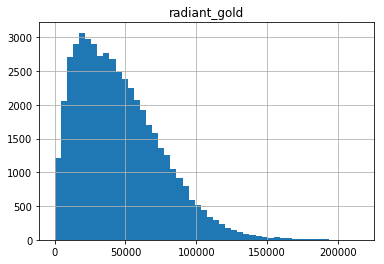

In [8]:
table.hist('radiant_gold', bins=50)
plt.show()

Из гистограммы видно, золото принимает значения больше `100.000` довольно редко. Сохраним в данных только те строки, где команда в сумме имеет меньше `100.000` золота.

In [9]:
table_truncated = table.query('radiant_gold < 100000')

Теперь гистограмма выглядит иначе

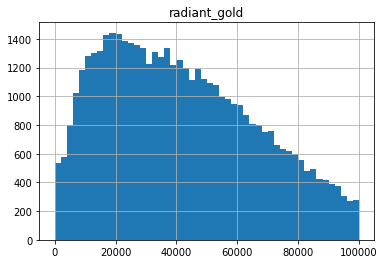

In [10]:
table_truncated.hist('radiant_gold', bins=50)
plt.show()

Совмещение нескольких гистограмм на одном графике позволяет обнажруживать закономерности в данных. Например, рассмотрим показатель `gold_diff` = `radiant_gold` - `dire_gold`, влияет ли он на победу команды Radiant в драке? Если нарисовать гистограммы `gold_diff` в случае, когда команда Radiant проиграла драку (синий цвет) и в случае победы (оранжевый), можно видеть смещение гистограмм относительное друг друга, что намекает на наличие связи. 

groupby группирует данные по значениям категориальной переменной, что позволяет рисовать несколько графиков на одной картинке, а также считать среднее/минимум/максимум по группам.

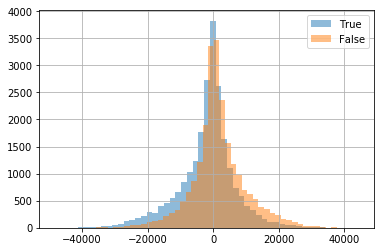

In [10]:
table_truncated.groupby('radiant_won')['gold_diff'].hist(alpha=0.5, bins=50)
plt.legend(table_truncated['radiant_won'].unique())
plt.show()

Пример подсчета средних значений `gold_diff` на разных уровнях категориальной переменной `radiant_won`.

In [11]:
table_truncated.groupby('radiant_won')['gold_diff'].mean()

radiant_won
False   -1900.767223
True     1690.560993
Name: gold_diff, dtype: float64

Поскольку герои в игре развиваются с течением времени, зарабатывая золото и опыт, естественным образом возникает вопрос: 
"Зависит ли золото от опыта, если да, то как?"

Чтобы ответить на этот вопрос, достаточно построить график зависимости золота от опыта. В этом нам поможет диаграмма рассеяния (eng.: Scatter Plot), которая строится следующим образом:
- Берется строка из таблицы данных
- Значение показателя `radiant_xp` откладывается по оси x
- Значение показателя `radiant_gold` откладывается по оси y
- В резульате получается точка на плоскости
- Алгоритм повторяется для всех строк в данных

Диаграмму можно легко построить с помощью встроенной функции pandas

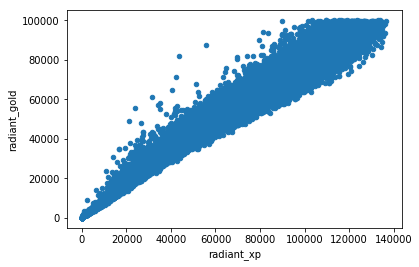

In [12]:
table_truncated.plot(kind='scatter', x='radiant_xp', y='radiant_gold')

Либо с помощью matplotlib:
- figure - создает пустой холст
- scatter - наносит точки на холст
- show - отображает картинку

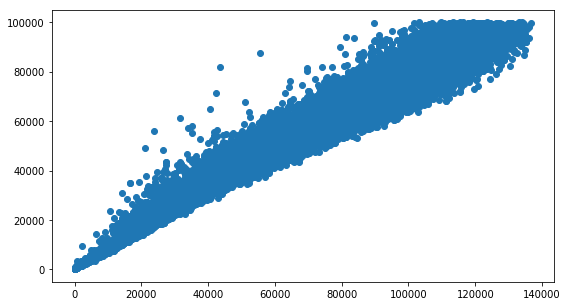

In [13]:
plt.figure(figsize=(9, 5))
plt.scatter(table_truncated['radiant_xp'], table_truncated['radiant_gold'])
plt.show()

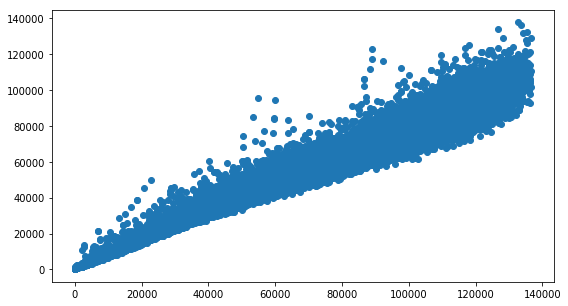

In [11]:
plt.figure(figsize=(9, 5))
plt.scatter(table_truncated['dire_xp'], table_truncated['dire_gold'])
plt.show()

Из графика легко видеть, что между золотом и опытом есть зависимость, причем линейная, т.е. существует формула
$$gold = k \cdot xp + b,$$
где k и b - некоторые константы.

##### Как выглядит диаграмма рассеяния в случае, когда между величинами нет зависимости?

Диаграмма рассеяния равномерно заполнилась точками, такая картина свидетельстует о том, что между `r1_hero` и `radiant_gold`
нет зависимости.

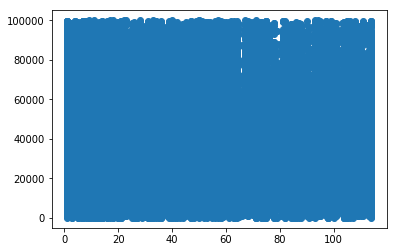

In [14]:
plt.figure()
plt.scatter(table_truncated['r1_hero'], table_truncated['radiant_gold'])
plt.show()